### Eigenvectors: Introduction to Latent Variable Models

- We introduce here with a small data set the idea of a Latent Variable. 
- We will use simple Linear Algebra methods to estimate the Latent Variables.  
- This a powerful approach to simplify and understand the nature of multi-variable data. 

In [1]:
import numpy as np
from numpy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt


### Rotation Matrix

$$
\begin{pmatrix} c \\ d \end{pmatrix}
= 
  \begin{pmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{pmatrix} 
  \begin{pmatrix} a \\ b \end{pmatrix}
$$

We discussed the notion of a rotation matrix.  

In [2]:
theta = np.pi/4 
rot = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
print(rot)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### Unit vectors 

A unit vector is a vector with length 1.  



In [3]:
u_x = np.array([1,0])
u_y = np.array([0,1])


we can use our rotation matrix to rotate the unit vectors 
To do matrix multiplication in python use @

In [4]:
v_x = rot@u_x
v_y = rot@u_y

print('v_x is', v_x)
print('v_y is', v_y)

v_x is [0.70710678 0.70710678]
v_y is [-0.70710678  0.70710678]


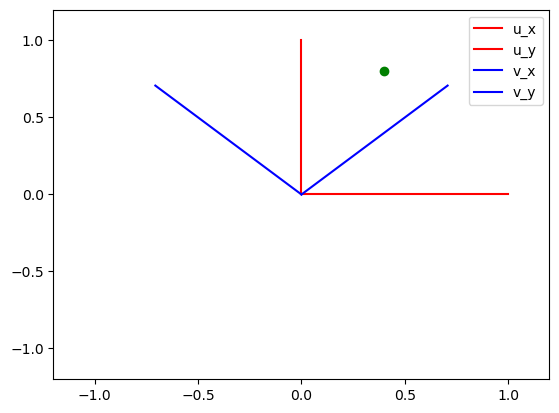

In [5]:
plt.figure()
plt.plot([0,u_x[0]],[0,u_x[1]],'r-', label = 'u_x')
plt.plot([0,u_y[0]],[0,u_y[1]],'r-', label = 'u_y')
plt.plot([0,v_x[0]],[0,v_x[1]],'b-', label = 'v_x')
plt.plot([0,v_y[0]],[0,v_y[1]],'b-', label = 'v_y')
plt.plot(0.4,0.8,'go')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.legend()
plt.show()

To project (0.4,0.8) into our new coordinate system we just need to take a dot product, because v_x, v_y are unit vectors.  

In [6]:
newx = np.dot(v_x,np.array([0.4,0.8]))
newy = np.dot(v_y,np.array([0.4,0.8]))
print(newx,newy)

0.8485281374238571 0.2828427124746191


The point is the same point. It has a different coordinate! 

### Eigenvalues and Eigenvectors of a Square Symmetric matrix. 

In [7]:
A = np.array([[2 ,-1],[-1,3]])  
d,v = linalg.eig(A) #calculate eigenvalues(d) and eigenvectors(v)
 


In [8]:
print(A)

[[ 2 -1]
 [-1  3]]


The linalg (Linear Algebra) function eig, returns the eigenvalues and eigenvectors of a square symmetric matrix.  

In [9]:
d,v = linalg.eig(A) #calculate eigenvalues(d) and eigenvectors(v)

In [10]:
print('eigenvectors')
print(v)
print('eigenvalues')
print(d)

eigenvectors
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
eigenvalues
[1.38196601 3.61803399]


In [11]:
theta = np.acos(v[0,0])
theta = theta*180/np.pi
print(theta)

148.282525588539


In interpreting the eigenvectors, remember that the eigenvector is a column vector. So the first eigenvector is v[:,0] 

When projecting a vector u we take the dot product with each eigenvector.  This is equivalent to $v^{T}u$.  When projecting a matrix, we have to project as $v^{T}Av$ 

In [12]:
z = np.transpose(v)@A@v #show that transformed matrix is diagonal
print(z)


[[ 1.38196601e+00 -1.11022302e-16]
 [-2.22044605e-16  3.61803399e+00]]


### An example with two channels of EEG data

In [15]:
eeg = loadmat('../data/eeg.mat') #Load 2 channels of EEG
x = eeg['Occ'][0]
x = x - np.mean(x) #I need to follow my own rule and remove the mean. 
y = eeg['Fro'][0]
y = y -np.mean(y) #I need to follow my own rule and remove the mean.
xy= np.array([x,y])

Text(0, 0.5, 'Channel Frontal')

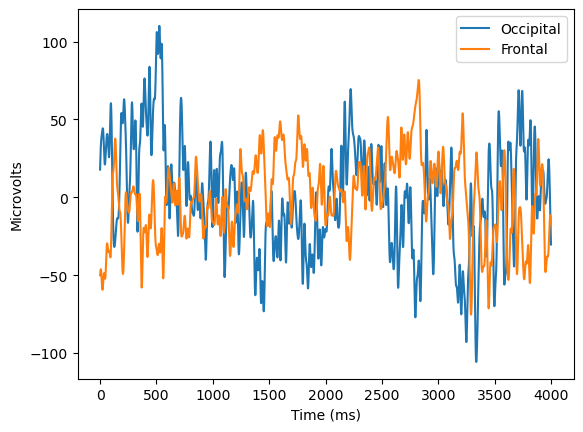

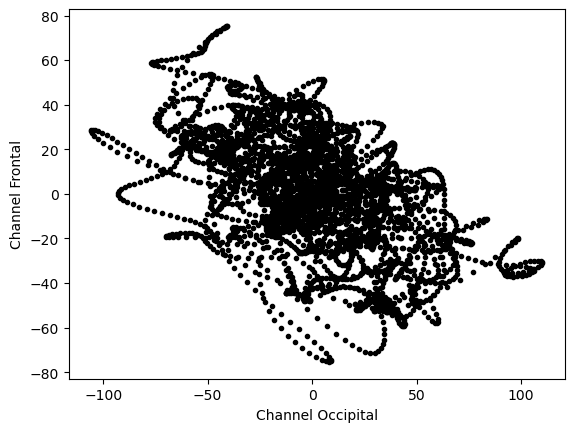

In [16]:
plt.figure()
plt.plot(xy[0,:],label = 'Occipital')
plt.plot(xy[1,:],label = 'Frontal')
plt.xlabel('Time (ms)')
plt.ylabel('Microvolts')
plt.legend()
plt.figure()
plt.plot(xy[0,:],xy[1,:],'k.')
plt.xlabel('Channel Occipital')
plt.ylabel('Channel Frontal')

### BIG PICTURE IDEA -> 
* I want to learn how to represent these data by two new variables that are rotations of the original data, and which will have several advantages for me in terms of representing the data in a simpler way:
* Removing correlation Between variables 
* If we had many channels, maybe reducing the number of variable (Dimensionality Reduction)  

### Covariance and Correlation matrix 

Given a data matrix $\textbf{X}$, with $n$ rows (observations) and $p$ columns (variables), the covariance between the  p variables can be obtained as 

$$\Sigma = \frac{1}{n} \textbf{X}^T\textbf{X}$$

$$
\Sigma =
\begin{pmatrix}
\operatorname{Var}(X_1) & \operatorname{Cov}(X_1,X_2) & \cdots & \operatorname{Cov}(X_1,X_n) \\
\operatorname{Cov}(X_2,X_1) & \operatorname{Var}(X_2) & \cdots & \operatorname{Cov}(X_2,X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\operatorname{Cov}(X_n,X_1) & \operatorname{Cov}(X_n,X_2) & \cdots & \operatorname{Var}(X_n)
\end{pmatrix}.
$$


Covariance matrices are square symmetric matrices. 

Correlation matrices are also square symmetric matrices, with the matrix form 

$$
R =
\begin{pmatrix}
1 & \rho_{12} & \rho_{13} & \cdots & \rho_{1n} \\
\rho_{21} & 1 & \rho_{23} & \cdots & \rho_{2n} \\
\rho_{31} & \rho_{32} & 1 & \cdots & \rho_{3n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\rho_{n1} & \rho_{n2} & \rho_{n3} & \cdots & 1
\end{pmatrix},
\qquad
\rho_{ij} = \operatorname{Corr}(X_i, X_j).

$$




[[1204.11003582 -449.68332931]
 [-449.68332931  652.87006965]]


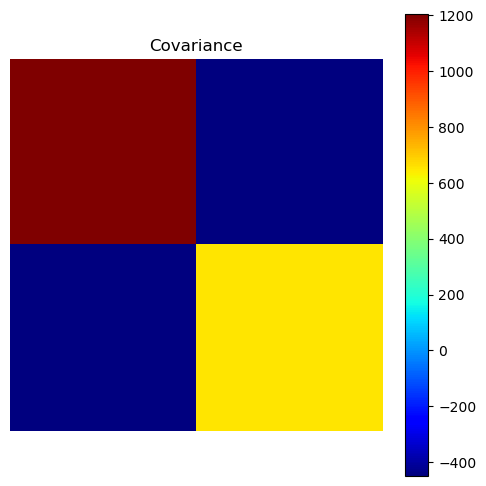

In [17]:
C = np.cov(xy)  #compute covariance - note that this computation divides by n-1 as it is "unbiased" 
                #In practice this wont matter, but theory prefers you dont. 
Cmult = (1/(4000-1))*(xy@np.transpose(xy)) #compute covariance by matrix multiplication
#This is what I call X transpose time X in the lecture notes. Python holds variables in rows. 
print(C)
plt.figure(figsize = (6,6))
plt.imshow(C,cmap = 'jet')
plt.axis("off")
plt.colorbar()
plt.title('Covariance')
plt.show()

[[ 1.        -0.5071779]
 [-0.5071779  1.       ]]


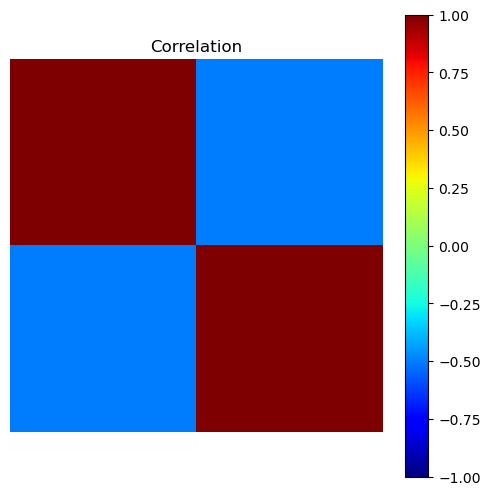

In [ ]:
R = np.corrcoef(xy) #compute correlation coefficient
print(R)
plt.figure(figsize = (6,6))
plt.imshow(R,cmap = 'jet',vmin = -1, vmax =1)
plt.axis("off")
plt.colorbar()
plt.title('Correlation')
plt.show()

In [18]:
d,v = linalg.eig(C) #Compute Eigenvalues and Eigenvectors of C
print('Covariance')
print(C)
print('Eigenvector')
print(v)
print('Eigenvalues')
print(d)

Covariance
[[1204.11003582 -449.68332931]
 [-449.68332931  652.87006965]]
Eigenvector
[[ 0.87251721  0.48858338]
 [-0.48858338  0.87251721]]
Eigenvalues
[1455.9191681   401.06093737]


Since we only have 2 variables, we can interpret the eigenvectors as a rotation matrix in the plane of the form
$$
\begin{pmatrix} c \\ d \end{pmatrix}
= 
  \begin{pmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{pmatrix} 
  \begin{pmatrix} a \\ b \end{pmatrix}
$$

In [23]:
theta = np.acos(v[0,0])*180/np.pi
print(theta)

29.24751376030076


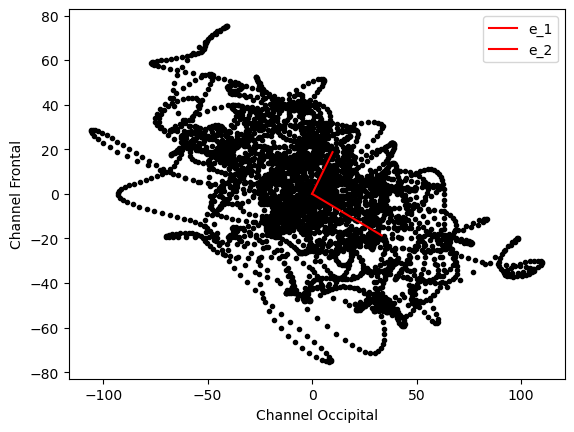

In [25]:
plt.figure()
plt.plot(xy[0,:],xy[1,:],'k.')
plt.xlabel('Channel Occipital')
plt.ylabel('Channel Frontal')
plt.plot([0,np.sqrt(d[0])*v[0,0]],[0,np.sqrt(d[0])*v[1,0]],'r-', label = 'e_1')
plt.plot([0,np.sqrt(d[1])*v[0,1]],[0,np.sqrt(d[1]*v[1,1])],'r-', label = 'e_2')
plt.legend()

### The eigenvalues contain valuable information about **variance** in the data.

In [ ]:
total_variance = np.sum(np.diag(C))
print(total_variance)
total_eigenvalue = np.sum(d)
print(total_eigenvalue)

1856.9801054743539
1856.9801054743539


- eigenvectors are a rotation matrix that can rotate the data into a new coordinate system.  
- The new coordinate system will preserve all of the variance of the original data, with some useful additional properties. 

In [26]:
Lambda = np.transpose(v)@C@v #Use eigenvectors to compute Diagonal matrix
xprime = v[:,0]@xy #project data onto new variables by a weighted sum
yprime = v[:,1]@xy 
xyprime = np.transpose(v)@xy #project data onto new variables by matrix multiplication in 1 step.

Text(0, 0.5, 'Channel PC2')

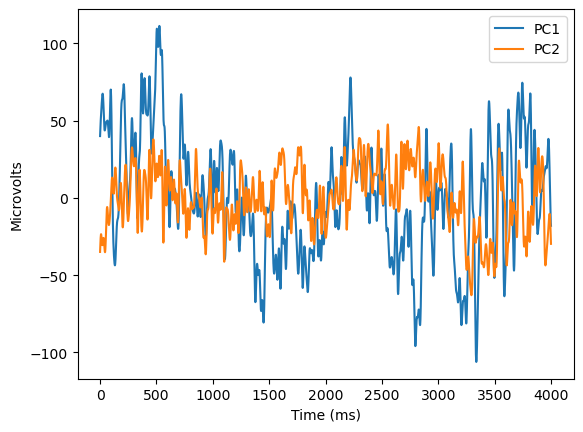

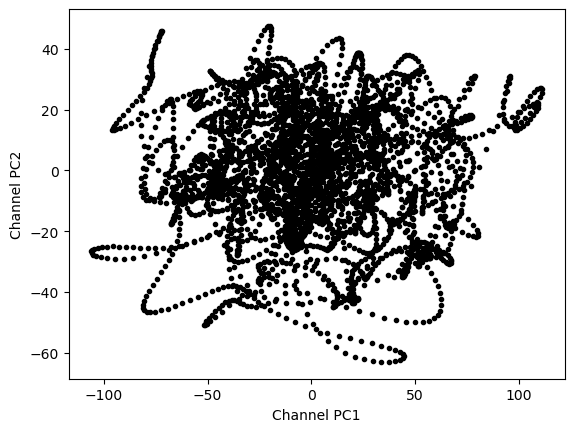

In [27]:
plt.figure()
plt.plot(xyprime[0,:],label = 'PC1')
plt.plot(xyprime[1,:],label = 'PC2')
plt.xlabel('Time (ms)')
plt.ylabel('Microvolts')
plt.legend()
plt.figure()
plt.plot(xyprime[0,:],xyprime[1,:],'k.')
plt.xlabel('Channel PC1')
plt.ylabel('Channel PC2')

- These figures above show the latent variables, i.e., the mixture of the original variables to define new variables.    
- There are two important things happening here:
    * The first latent variable is selecting for the direction in the data with the most variance. We refer to this as the first **principal component**
    * The second latent variable must be perpendicular to the first latent variable, because this is a rotation matrix of the original data space. 
    * As a consequence the second **principal component** is always perpendicular to the first principal component. 
    * We can have as many principal components as data variables.  

Covariance of Principal Components
[[1.45591917e+03 4.27569402e-14]
 [4.27569402e-14 4.01060937e+02]]
Correlation of Principal Components
[[1.00000000e+00 5.59542146e-17]
 [5.59542146e-17 1.00000000e+00]]


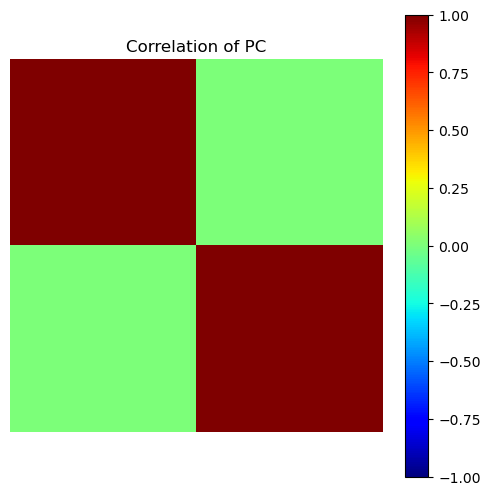

In [35]:
Cprime = np.cov(xyprime) #covariance matrix of new variables 
print('Covariance of Principal Components')
print(Cprime)
print('Correlation of Principal Components')
Rprime = np.corrcoef(xyprime) #correlation matrix of new variables 
print(Rprime)
R = np.corrcoef(xy) #compute correlation coefficient
plt.figure(figsize = (6,6))
plt.imshow(Rprime,cmap = 'jet',vmin = -1, vmax =1)
plt.axis("off")
plt.colorbar()
plt.title('Correlation of PC')
plt.show()

I have gone through the math here of a method called **Principal Components Analysis**.  
**PCA** is the entry point into a wide variety of methods of dimensional reduction and latent variable estimation.  These methods all have different approaches and goals, but arrive at the same thing -> a set of new variables obtained by a linear mixture of the original variables. 
### Why should i care? 
* Most machine learning and data modeling algorithms will perform poorly if the predictors are highly correlated. We may want to represent the data using just a few prinicpal components.  
* All data analysis methods perform poorly or fail if the number of observations is smaller than the number of variables.  This is a constant problem in any field that processes images, including brain imaging data.  